# Keep-it-dry! LinearSVC

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearnex import patch_sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from pprint import pprint

## Dataset Selection

In [3]:
datasets_dict = {}

datasets_dict['ii_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_adasyn.csv', index_col=0)
datasets_dict['ii_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_ros.csv', index_col=0)
datasets_dict['ii_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_rus.csv', index_col=0)
datasets_dict['ii_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smote.csv', index_col=0)
datasets_dict['ii_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smotenc_1.csv', index_col=0)

datasets_dict['ii_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_adasyn.csv', index_col=0)
datasets_dict['ii_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
datasets_dict['ii_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_rus.csv', index_col=0)
datasets_dict['ii_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smote.csv', index_col=0)
datasets_dict['ii_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smotenc_1.csv', index_col=0)

datasets_dict['ii_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_adasyn.csv', index_col=0)
datasets_dict['ii_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
datasets_dict['ii_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_rus.csv', index_col=0)
datasets_dict['ii_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smote.csv', index_col=0)
datasets_dict['ii_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smotenc_1.csv', index_col=0)

datasets_dict['ki_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_adasyn.csv', index_col=0)
datasets_dict['ki_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
datasets_dict['ki_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_rus.csv', index_col=0)
datasets_dict['ki_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smote.csv', index_col=0)
datasets_dict['ki_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smotenc_1.csv', index_col=0)

datasets_dict['ki_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_adasyn.csv', index_col=0)
datasets_dict['ki_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
datasets_dict['ki_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_rus.csv', index_col=0)
datasets_dict['ki_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smote.csv', index_col=0)
datasets_dict['ki_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smotenc_1.csv', index_col=0)

datasets_dict['ki_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_adasyn.csv', index_col=0)
datasets_dict['ki_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_ros.csv', index_col=0)
datasets_dict['ki_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_rus.csv', index_col=0)
datasets_dict['ki_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smote.csv', index_col=0)
datasets_dict['ki_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smotenc_1.csv', index_col=0)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Use

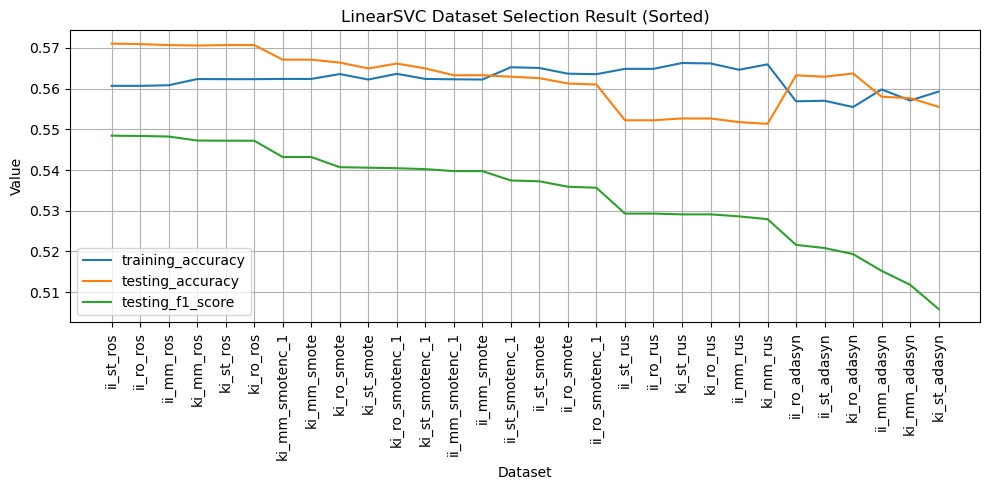

In [4]:
dataset_result = {}
dataset_result['dataset'] = []
dataset_result['training_accuracy'] = []
dataset_result['testing_accuracy'] = []
dataset_result['testing_f1_score'] = []

for title, data in datasets_dict.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.2, stratify=y_df, random_state=42)
    
    linearsvc_dataset = LinearSVC(max_iter=10000)
    linearsvc_dataset.fit(X_train, y_train)
    
    y_predict = linearsvc_dataset.predict(X_val)

    dataset_result['dataset'].append(title)
    dataset_result['training_accuracy'].append(linearsvc_dataset.score(X_train, y_train))
    dataset_result['testing_accuracy'].append(linearsvc_dataset.score(X_val, y_val))
    dataset_result['testing_f1_score'].append(f1_score(y_val, y_predict))

df_result = pd.DataFrame(dataset_result)
df_result_sorted = df_result.sort_values(by='testing_f1_score', ascending=False)

plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result_sorted, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("LinearSVC Dataset Selection Result (Sorted)")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

## Data Read

In [4]:
df_train = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
df_test = pd.read_csv('./../Preprocessing/kid_test_ii_st.csv', index_col=0)

In [5]:
df_train.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,-1.228626,7.0,8.0,9,5,-0.101025,-0.055370,-0.681939,0.249052,0.792359,...,-0.766589,-0.188349,-1.063252,2.408780,-0.555022,-0.407370,-1.304774,-1.072612,0.510824,0.0
1,-1.105316,7.0,8.0,9,5,1.599402,-1.246039,-0.984141,0.422591,-0.193136,...,1.025525,1.330536,-0.846994,0.037447,-0.819723,-0.431608,-0.400081,-0.501228,-0.158605,0.0
2,-1.168645,7.0,8.0,9,5,1.113565,-1.722306,-0.379737,0.266105,-0.080278,...,1.294947,-0.371663,0.671452,1.446590,0.944058,1.783292,-0.600164,0.895553,-0.311032,0.0
3,-0.688792,7.0,8.0,9,5,1.356484,-1.484172,-0.077535,-0.498268,-0.547834,...,1.048734,0.165912,-0.535743,-1.159255,-0.358056,-0.336960,0.769173,0.428552,1.018197,0.0
4,1.550606,7.0,8.0,9,5,0.384811,-1.484172,0.526868,1.559120,1.227669,...,-1.104629,0.701305,0.511864,0.501644,0.472588,-2.272752,-1.225672,-0.030003,-0.992275,0.0


In [6]:
df_test_id = df_test[['id']]
df_test.drop(columns=['id', 'product_code', 'product_code_F', 'product_code_G', 'product_code_H', 'product_code_I'], inplace=True)
df_test.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-0.212543,5.0,6.0,6,4,-0.343944,0.182763,-0.077535,1.517992,-1.565573,...,-0.367769,-0.635410,-0.151977,-0.742570,1.428657,-1.776033,0.535598,-0.834148,0.753160,-0.545731
1,-0.368547,5.0,6.0,6,4,0.870647,-0.055370,-1.890746,0.091563,0.196830,...,0.343278,0.605750,-1.542107,-0.835152,0.532682,1.618734,0.454767,-0.146820,-1.423768,-1.341893
2,-0.403300,5.0,6.0,6,4,0.141893,0.897164,-0.681939,0.685407,-1.260251,...,-1.244130,0.314128,0.675117,-0.731791,-0.547454,-2.039843,-0.216059,1.374739,-0.265917,-0.346779
3,-0.388884,5.0,6.0,6,4,0.141893,0.659031,1.131272,-1.277687,-0.850132,...,-0.074985,0.361555,1.489117,-2.027321,-0.529520,-0.134353,-0.264419,-1.579971,-0.211615,-0.874648
4,2.063925,5.0,6.0,6,4,1.599402,1.849699,0.526868,0.016330,0.968700,...,0.117217,0.946817,-1.120194,-0.891458,0.165739,0.372768,0.092065,-1.112003,0.415278,0.812268


In [7]:
# Scale
# Scaled already

In [8]:
X_df = df_train[df_train.columns[:-1]]
y_df = df_train[df_train.columns[-1]]

## PCA

In [9]:
n_components_range = range(10, 23)  # Explore components from 10 to 22

best_n_components = None
best_score = -np.inf  # Initialize with a negative infinity

for n_components in n_components_range:
  # Apply PCA with current n_components
  pca = PCA(n_components=n_components)
  pca_data = pca.fit_transform(X_df)

  # Train linearsvc on transformed data
  model = LinearSVC(max_iter=10000)
  model.fit(pca_data, y_df)

  # Evaluate performance on testing set (e.g., using F1 score)
  score = model.score(pca.transform(X_df), y_df)
  print(f"{n_components} components score: {score}")

  # Update best component and score if performance improves
  if score > best_score:
    best_n_components = n_components
    best_score = score

print("Best number of components based on LinearSVC performance:", best_n_components)

10 components score: 0.5615171358921658
11 components score: 0.5617800296352947
12 components score: 0.5630944983509393
13 components score: 0.5630228000573586
14 components score: 0.5620429233784235
15 components score: 0.5634768892500358
16 components score: 0.5639548778739066
17 components score: 0.5633812915252617
18 components score: 0.56512595000239
19 components score: 0.5658907318005831
20 components score: 0.5658190335070026
21 components score: 0.5662970221308733
22 components score: 0.5650542517088093
Best number of components based on LinearSVC performance: 21


In [10]:
pca = PCA(n_components=21)
X_df_pca = pca.fit_transform(X_df)
df_test_pca = pca.transform(df_test)

## Hyperparameter Tuning using GridSearchCV

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_df_pca, y_df, test_size=.75, random_state=42, stratify=y_df)

In [17]:
# Define model
model = LinearSVC() 

# Define hyperparameter grid
param_grid = {
    'penalty':['l1', 'l2'],
    'loss':['squared_hinge', 'hinge'],
    'C': np.logspace(-4, 4, 5),  # Search for different regularization strengths
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1') 

In [18]:
# GridSearchCV fitting
grid_search.fit(X_train, y_train)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear fail

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'loss': ['squared_hinge', 'hinge'],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [19]:
svc_best = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best f1-score: {grid_search.best_score_}")

Best parameters: {'C': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
Best f1-score: 0.5409632834943705


Previously with CV:5
- Best parameters: {'C': 4.641588833612777, 'loss': 'squared_hinge', 'penalty': 'l2'}
- Best f1-score: 0.5372615487167931

## Prediction

In [20]:
y_pred = svc_best.predict(df_test_pca)
y_pred_df = pd.DataFrame(y_pred, columns=['failure'])

In [21]:
y_submission = pd.concat([df_test_id, y_pred_df], axis=1)

In [22]:
y_submission.head()

,id,failure
0,26570,1.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,1.0


In [23]:
y_submission.to_csv('./../Submission/kid_submission_linearsvc_latesub_v3.csv', index=False)